In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mp
npr = np.random

mp.rcParams['font.family'] = ['NanumGothic', 'sans-serif']

pd_data = pd.read_csv('전국도서관표준데이터.csv', encoding='cp949')
#print(pd_data.head())
print(pd_data.columns)

Index(['도서관명', '시도명', '시군구명', '도서관유형', '휴관일', '평일운영시작시각', '평일운영종료시각',
       '토요일운영시작시각', '토요일운영종료시각', '공휴일운영시작시각', '공휴일운영종료시각', '열람좌석수', '자료수(도서)',
       '자료수(연속간행물)', '자료수(비도서)', '대출가능권수', '대출가능일수', '소재지도로명주소', '운영기관명',
       '도서관전화번호', '부지면적', '건물면적', '홈페이지주소', '위도', '경도', '데이터기준일자', '제공기관코드',
       '제공기관명'],
      dtype='object')


In [2]:
data = pd_data[['시도명','자료수(도서)', '위도', '경도']]
#print(data)
#print(data.dtypes)
'''
for i in data:
    print(i, data[i].hasnans)
    
a = data['위도'].isna()
b = data['경도'].isna()
print(data['위도'][a])
print(data['경도'][b])
'''
g = data[['시도명', '자료수(도서)']].groupby('시도명')
g_data = g.agg([np.sum, lambda x: len(x)])
print(g_data)

          자료수(도서)           
              sum <lambda_0>
시도명                         
강원도       3053867         77
경기도      34677864        586
경상남도     13844635        415
경상북도      7459276        158
광주광역시     5642888        353
대구광역시     6678169        224
대전광역시     5505357        110
부산광역시     4201839        183
서울특별시    13267038        542
세종특별자치시    379899         10
울산광역시     3587430        126
인천광역시     6220226        194
전라남도      7091883        130
전라북도      4140280        140
제주특별자치도   3839001         37
충청남도      4587754         88
충청북도      8058517        111


C:\Users\home\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='경도', ylabel='위도'>

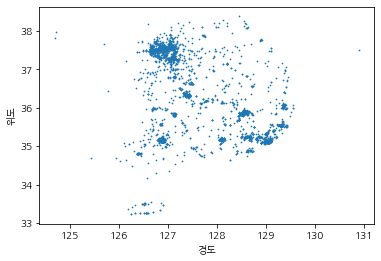

In [3]:
data.plot(kind='scatter', x='경도', y='위도', s=0.5)

<AxesSubplot: xlabel='시도명'>

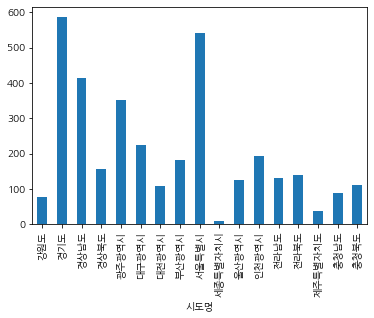

In [4]:
g_data.iloc[:,1].plot(kind='bar')

[]

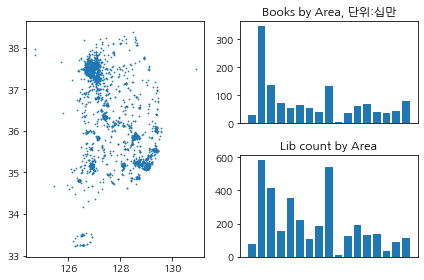

In [5]:
fig = plt.figure(tight_layout=True)
left = fig.add_subplot(1,2,1)
left.scatter(data['경도'], data['위도'], s=0.5)

top = fig.add_subplot(2,2,2)
top.bar(g_data.index, g_data.iloc[:,0]/10**5)  # 100000
top.set_title('Books by Area, 단위:십만')
top.set_xticks([])

bot = fig.add_subplot(2,2,4)
bot.bar(g_data.index, g_data.iloc[:,1])
bot.set_title('Lib count by Area')
bot.set_xticks([])